<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Meias_Ofensivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!apt-get install -y chromium-chromedriver

In [2]:
#!pip install soccerdata

In [3]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[11/29/24 02:44:10] INFO     No custom team name replacements found. You can configure these in       ]8;id=942849;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=724902;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=20869;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=304151;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [4]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [5]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[11/29/24 02:44:12] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=578988;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=675633;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [6]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas

In [7]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-059   
                                  Alex Santana        BRA  MF,FW  29-200   
                                  Bento               BRA     GK  25-172   
                                  Bruno Praxedes      BRA  MF,FW  22-295   
                                  Bruno Zapelli       ARG  MF,FW  22-196   

                                                    born Playing Time         \
                                                                   MP Starts   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998           17     13   
                                  Alex Santana      1995            4      0   
                                  Bento             1999            7      7   
                                  Bruno Praxedes    2002            7      2   
                                  Bruno Zapelli     2002           31     16   

                                                               Performance  \
                                                     Min   90s         Gls   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1065  11.8           4   
                                  Alex Santana       101   1.1           0   
                                  Bento              630   7.0           0   
                                  Bruno Praxedes     237   2.6           0   
                                  Bruno Zapelli     1384  15.4           0   

                                                        ... Per 90 Minutes  \
                                                   Ast  ...            Gls   
league      season team           player                ...                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  ...           0.34   
                                  Alex Santana       0  ...            0.0   
                                  Bento              0  ...            0.0   
                                  Bruno Praxedes     0  ...            0.0   
                                  Bruno Zapelli      4  ...            0.0   

                                                                             \
                                                     Ast   G+A  G-PK G+A-PK   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.08  0.42  0.34   0.42   
                                  Alex Santana       0.0   0.0   0.0    0.0   
                                  Bento              0.0   0.0   0.0    0.0   
                                  Bruno Praxedes     0.0   0.0   0.0    0.0   
                                  Bruno Zapelli     0.26  0.26   0.0   0.26   

                                                                             \
                                                      xG   xAG xG+xAG  npxG   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.27  0.19   0.45  0.27   
                                  Alex Santana      0.06   0.0   0.06  0.06   
                                  Bento              0.0   0.0    0.0   0.0   
                                  Bruno Praxedes    0.03  0.12   0.15  0.03   
                                  Bruno Zapelli     0.24  0.27   0.51  0.24   

                                                             
                                                   npxG+xAG  
league      season team           player                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     0.45  
                                  Ale

In [8]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-059   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-200   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-172   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-295   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-196   

   born Playing Time         ... Per 90 Minutes                           \
                  MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK   
0  1998           17     13  ...           0.34  0.08  0.42  0.34   0.42   
1  1995            4      0  ...            0.0   0.0   0.0   0.0    0.0   
2  1999            7      7  ...            0.0   0.0   0.0   0.0    0.0   
3  2002            7      2  ...            0.0   0.0   0.0   0.0    0.0   
4  2002           31     16  ...            0.0  0.26  0.26   0.0   0.26   

                                     
     xG   xAG xG+xAG  npxG npxG+xAG  
0  0.27  0.19   0.45  0.27     0.45  
1  0.06   0.0   0.06  0.06     0.06  
2   0.0   0.0    0.0   0.0      0.0  
3  0.03  0.12   0.15  0.03     0.15  
4  0.24  0.27   0.51  0.24     0.51  

[5 rows x 37 columns]

In [9]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-059   
                                  Alex Santana        BRA  MF,FW  29-200   
                                  Bento               BRA     GK  25-172   
                                  Bruno Praxedes      BRA  MF,FW  22-295   
                                  Bruno Zapelli       ARG  MF,FW  22-196   

                                                    born   90s Performance  \
                                                                      CrdY   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8           5   
                                  Alex Santana      1995   1.1           2   
                                  Bento             1999   7.0           1   
                                  Bruno Praxedes    2002   2.6           0   
                                  Bruno Zapelli     2002  15.4           3   

                                                                       ...  \
                                                   CrdR 2CrdY Fls Fld  ...   
league      season team           player                               ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    1     1  14  24  ...   
                                  Alex Santana        0     0   3   1  ...   
                                  Bento               0     0   1   0  ...   
                                  Bruno Praxedes      0     0   8   2  ...   
                                  Bruno Zapelli       0     0  19  18  ...   

                                                                             \
                                                   Crs Int TklW PKwon PKcon   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  29   4   16     0     0   
                                  Alex Santana       0   0    0     0     0   
                                  Bento              0   0    0     0     1   
                                  Bruno Praxedes     7   2    4     0     0   
                                  Bruno Zapelli     91   8   19     0     0   

                                                            Aerial Duels       \
                                                   OG Recov          Won Lost   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0    61            6    7   
                                  Alex Santana      0     6            2    4   
                                  Bento             0     4            2    0   
                                  Bruno Praxedes    0    13            3    2   
                                  Bruno Zapelli     0    70            4   17   

                                                           
                                                     Won%  
league      season team           player                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   46.2  
                                  Alex Santana       33.3  
                                  Bento             100.0  
                                  Bruno Praxedes     60.0  
                                  Bruno Zapelli      19.0  

[5 rows x 21 columns]

In [10]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-059   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-200   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-172   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-295   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-196   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  11.8           5  ...  29   4   16     0     0  0    61            6   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.4           3  ...  91   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   46.2  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [11]:
player_season_passing = fbref.read_player_season_stats(stat_type="passing")
player_season_passing.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-059   
                                  Alex Santana        BRA  MF,FW  29-200   
                                  Bento               BRA     GK  25-172   
                                  Bruno Praxedes      BRA  MF,FW  22-295   
                                  Bruno Zapelli       ARG  MF,FW  22-196   

                                                    born   90s Total       \
                                                                 Cmp  Att   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8   288  377   
                                  Alex Santana      1995   1.1    45   50   
                                  Bento             1999   7.0   121  171   
                                  Bruno Praxedes    2002   2.6    70  100   
                                  Bruno Zapelli     2002  15.4   527  722   

                                                                          ...  \
                                                    Cmp% TotDist PrgDist  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  76.4    4172    1174  ...   
                                  Alex Santana      90.0     619     131  ...   
                                  Bento             70.8    4251    3329  ...   
                                  Bruno Praxedes    70.0    1177     365  ...   
                                  Bruno Zapelli     73.0    8429    2300  ...   

                                                    Long Ast  xAG Expected  \
                                                    Cmp%                xA   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  41.4   1  2.2      1.6   
                                  Alex Santana       0.0   0  0.0      0.1   
                                  Bento             56.4   0  0.0      0.0   
                                  Bruno Praxedes    66.7   0  0.3      0.4   
                                  Bruno Zapelli     49.1   4  4.1      4.0   

                                                          KP 1/3 PPA CrsPA  \
                                                   A-xAG                     
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  -1.2  20  27  21     4   
                                  Alex Santana       0.0   0   2   0     0   
                                  Bento              0.0   0   4   0     0   
                                  Bruno Praxedes    -0.3   4  11   1     0   
                                  Bruno Zapelli     -0.1  45  48  29     7   

                                                   PrgP  
                                                         
league      season team           player                 
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   52  
                                  Alex Santana        2  
                                  Bento               0  
                                  Bruno Praxedes     12  
                                  Bruno Zapelli      77  

[5 rows x 28 columns]

In [12]:
player_season_passing = player_season_passing.reset_index()
print(player_season_passing.columns)
player_season_passing.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-059   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-200   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-172   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-295   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-196   

   born   90s Total  ...  Long Ast  xAG Expected        KP 1/3 PPA CrsPA PrgP  
                Cmp  ...  Cmp%                xA A-xAG                         
0  1998  11.8   288  ...  41.4   1  2.2      1.6  -1.2  20  27  21     4   52  
1  1995   1.1    45  ...   0.0   0  0.0      0.1   0.0   0   2   0     0    2  
2  1999   7.0   121  ...  56.4   0  0.0      0.0   0.0   0   4   0     0    0  
3  2002   2.6    70  ...  66.7   0  0.3      0.4  -0.3   4  11   1     0   12  
4  2002  15.4   527  ...  49.1   4  4.1      4.0  -0.1  45  48  29     7   77  

[5 rows x 32 columns]

In [13]:
player_season_possession = fbref.read_player_season_stats(stat_type="possession")
player_season_possession.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos     age  \
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  26-059   
                                  Alex Santana        BRA  MF,FW  29-200   
                                  Bento               BRA     GK  25-172   
                                  Bruno Praxedes      BRA  MF,FW  22-295   
                                  Bruno Zapelli       ARG  MF,FW  22-196   

                                                    born   90s Touches  \
                                                               Touches   
league      season team           player                                 
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  1998  11.8     543   
                                  Alex Santana      1995   1.1      59   
                                  Bento             1999   7.0     184   
                                  Bruno Praxedes    2002   2.6     130   
                                  Bruno Zapelli     2002  15.4     907   

                                                                            \
                                                   Def Pen Def 3rd Mid 3rd   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio       4      52     214   
                                  Alex Santana           0       4      31   
                                  Bento                156     183       1   
                                  Bruno Praxedes         4      24      57   
                                  Bruno Zapelli         11      89     406   

                                                            ... Carries  \
                                                   Att 3rd  ... Carries   
league      season team           player                    ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     288  ...     360   
                                  Alex Santana          24  ...      35   
                                  Bento                  0  ...      97   
                                  Bruno Praxedes        52  ...      58   
                                  Bruno Zapelli        426  ...     531   

                                                                             \
                                                   TotDist PrgDist PrgC 1/3   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    2267    1087   43  30   
                                  Alex Santana         205      98    1   4   
                                  Bento                508     285    0   0   
                                  Bruno Praxedes       436     204    5   3   
                                  Bruno Zapelli       2702    1185   37  24   

                                                               Receiving       
                                                   CPA Mis Dis       Rec PrgR  
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   8  33  23       374  121  
                                  Alex Santana       1   0   0        39    1  
                                  Bento              0   0   0        76    0  
                                  Bruno Praxedes     0   1   2        75   13  
                                  Bruno Zapelli      8  32  35       633  114  

[5 rows x 27 columns]

In [14]:
player_season_possession = player_season_possession.reset_index()
print(player_season_possession.columns)
player_season_possession.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season            team            player nation    pos     age  \
                                                                                
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  26-059   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  29-200   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  25-172   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  22-295   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  22-196   

   born   90s Touches  ... Carries                                       \
              Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis   
0  1998  11.8     543  ...     360    2267    1087   43  30   8  33  23   
1  1995   1.1      59  ...      35     205      98    1   4   1   0   0   
2  1999   7.0     184  ...      97     508     285    0   0   0   0   0   
3  2002   2.6     130  ...      58     436     204    5   3   0   1   2   
4  2002  15.4     907  ...     531    2702    1185   37  24   8  32  35   

  Receiving       
        Rec PrgR  
0       374  121  
1        39    1  
2        76    0  
3        75   13  
4       633  114  

[5 rows x 31 columns]

In [15]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(filter(None, col)).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(filter(None, col)).strip() for col in player_season_misc.columns]
player_season_possession.columns = ['_'.join(filter(None, col)).strip() for col in player_season_possession.columns]
player_season_passing.columns = ['_'.join(filter(None, col)).strip() for col in player_season_passing.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_possession.columns)
print(player_season_passing.columns)

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born',
       '90s', 'Performance_CrdY', 'Performance_CrdR', 'Performance_2CrdY',
       'Performance_Fls', 'Performance_Fld', 'Performance_Off',
       'Perform

In [16]:
# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player', 'team','age','pos','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player', 'team', 'Performance_Crs']
]
df_passing_selected = player_season_passing[
    ['player', 'team','1/3','KP']
]
df_possession_selected = player_season_possession[
    ['player', 'team', 'Take-Ons_Att','Take-Ons_Succ',]
]
# 4. Realizar o merge dos DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_possession_selected, on=['player', 'team'], how='inner')
df_merged = pd.merge(df_merged, df_passing_selected, on=['player', 'team'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

             player            team     age    pos  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  26-059  FW,MF              1065   
1      Alex Santana  Ath Paranaense  29-200  MF,FW               101   
2             Bento  Ath Paranaense  25-172     GK               630   
3    Bruno Praxedes  Ath Paranaense  22-295  MF,FW               237   
4     Bruno Zapelli  Ath Paranaense  22-196  MF,FW              1384   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               121          3.1           2.2                 4   
1                 1          0.1           0.0                 0   
2                 0          0.0           0.0                 0   
3                13          0.1           0.3                 0   
4               114          3.7           4.1                 0   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                1                43                52               29   
1       

In [17]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())

             player            team     age    pos  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  26-059  FW,MF              1065   
4     Bruno Zapelli  Ath Paranaense  22-196  MF,FW              1384   
5         Christian  Ath Paranaense  23-346  MF,FW              1366   
7             Erick  Ath Paranaense  27-015     MF              2373   
8       Fernandinho  Ath Paranaense  39-209     MF              1430   

   Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
0               121          3.1           2.2                 4   
4               114          3.7           4.1                 0   
5                96          1.5           1.8                 1   
7                39          3.5           1.4                 2   
8                36          1.6           2.4                 1   

   Performance_Ast  Progression_PrgC  Progression_PrgP  Performance_Crs  \
0                1                43                52               29   
4       

In [18]:
# Selecionar as colunas desejadas para análise
meia_ofensivo = filtered_data[[
    ('player'),
    ('team'),
    ('pos'),
    ('Playing Time_Min'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('KP'),
    ('1/3'),
    ('Performance_Crs'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ')
]]

# Renomear as colunas para facilitar o uso
meia_ofensivo.columns = ['jogador','time','posicao', 'Minutos','xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(meia_ofensivo.head())


# Criar a nova coluna 'Dribles' no formato "50% (5/10)"
meia_ofensivo['%Dribles'] = (
    (meia_ofensivo['Dribles_certos'] / meia_ofensivo['Dribles_Tentados'] * 100).round(1).astype(str) + '% (' +
    meia_ofensivo['Dribles_certos'].astype(str) + '/' +
    meia_ofensivo['Dribles_Tentados'].astype(str) + ')'
)

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
meia_ofensivo['Acoes Ofensivas'] = meia_ofensivo['PrgC'] + meia_ofensivo['PrgP']

# Remover jogadores com todas as métricas iguais a 0
meia_ofensivo = meia_ofensivo[(meia_ofensivo[['xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]

# Exibir as primeiras linhas para conferir
print(meia_ofensivo)

            jogador            time posicao  Minutos   xG  xAG  G-PK  \
0  Agustín Canobbio  Ath Paranaense   FW,MF     1065  3.1  2.2     4   
4     Bruno Zapelli  Ath Paranaense   MF,FW     1384  3.7  4.1     0   
5         Christian  Ath Paranaense   MF,FW     1366  1.5  1.8     1   
7             Erick  Ath Paranaense      MF     2373  3.5  1.4     2   
8       Fernandinho  Ath Paranaense      MF     1430  1.6  2.4     1   

   Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  \
0             1    43    52        20           27     29                41   
4             4    37    77        45           48     91                53   
5             0    14    55        14           36     27                23   
7             1    16   110        15          109      7                32   
8             3    38   160        36          129     48                23   

   Dribles_certos  
0              15  
4              29  
5               9  
7           

<ipython-input-18-fac389a4472e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meia_ofensivo['%Dribles'] = (


1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (MEIA OFENSIVO)

In [19]:
# Criar a variável dependente (Contribuições ofensivas)
meia_ofensivo['Contribuicoes_Ofensivas'] = meia_ofensivo['G-PK'] + meia_ofensivo['Assistencias']
y = meia_ofensivo['Contribuicoes_Ofensivas']
X = meia_ofensivo[
    [
        'Minutos',
        'xG',
        'xAG',
        'PrgC',
        'PrgP',
        'Key_Pass',
        'Passing 1/3',
        'Cross',
        'Dribles_Tentados',
        'Dribles_certos'
    ]
]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Regressão Linear Simples
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Regressão Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Regressão Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")


R² da Regressão Linear: 0.63
R² da Regressão Ridge: 0.63
R² da Regressão Lasso: 0.63


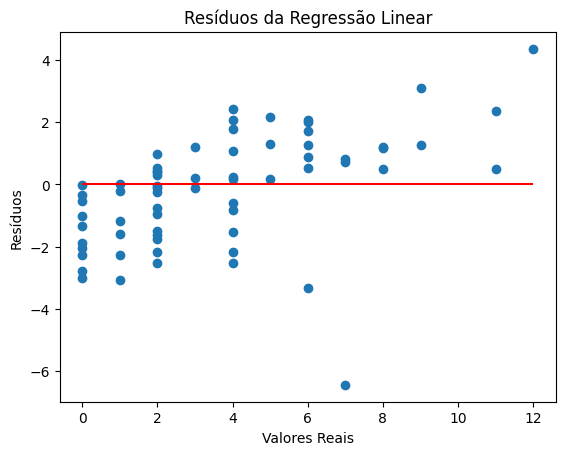

In [20]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()

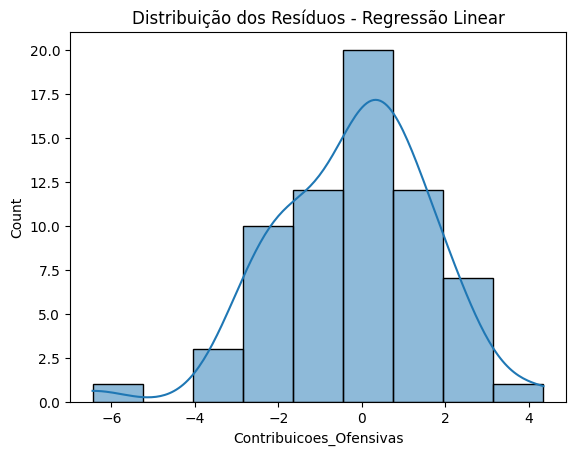

In [21]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

2. Criar modelos de classificação para (Meias Ofensivos)

In [29]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
meia_ofensivo['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','Key_Pass','Dribles_certos','Passing 1/3','Cluster']])

      xG  xAG  G-PK  Assistencias  Key_Pass  Dribles_certos  Passing 1/3  Cluster
0    3.1  2.2     4             1        20              15           27        0
4    3.7  4.1     0             4        45              29           48        0
5    1.5  1.8     1             0        14               9           36        1
7    3.5  1.4     2             1        15              19          109        0
8    1.6  2.4     1             3        36              11          129        5
..   ...  ...   ...           ...       ...             ...          ...      ...
715  0.3  0.4     0             0         8               9           29        1
717  3.5  3.4     5             5        37              37           79        2
720  2.4  1.6     1             0        19              12           15        1
725  0.2  0.5     0             1         7               4           32        1
729  3.8  1.0     5             1        25               4           70        1

[220 rows x 8 c

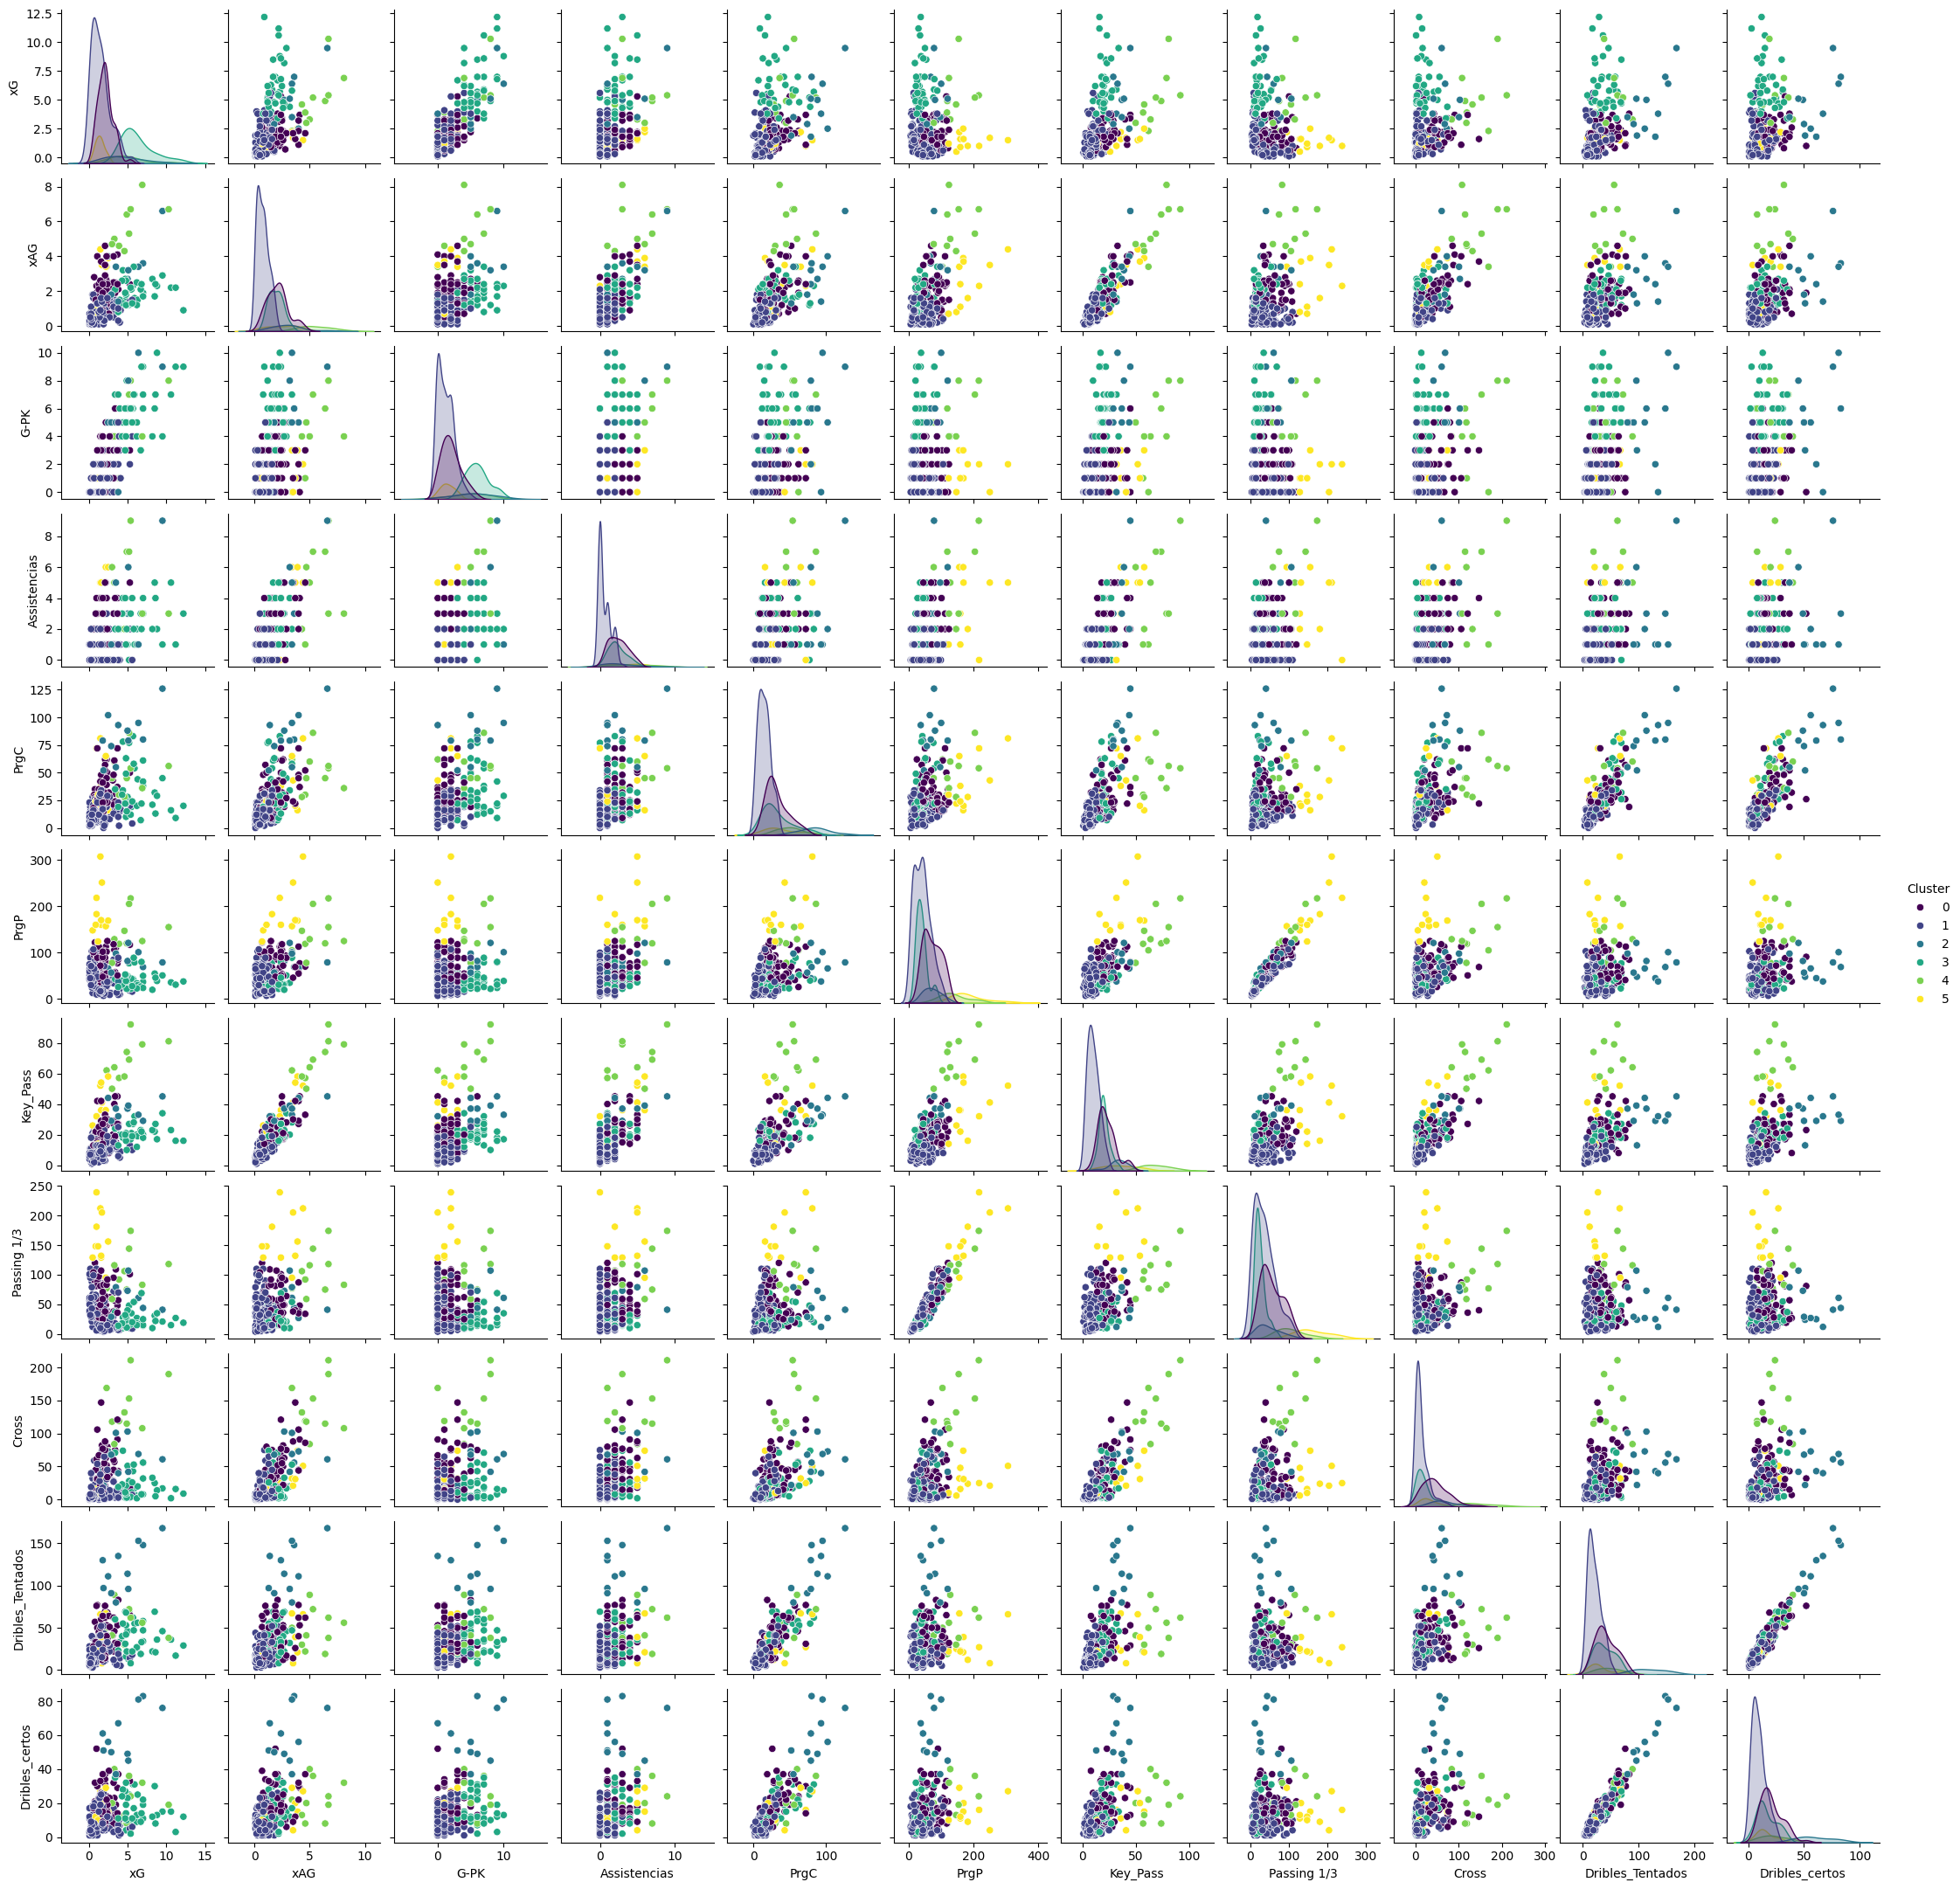

In [30]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(meia_ofensivo[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()

In [31]:
# Estatísticas médias por cluster
cluster_stats = meia_ofensivo.groupby('Cluster')[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]].mean()
cluster_stats['Jogadores'] = meia_ofensivo['Cluster'].value_counts()
print(cluster_stats)


               xG       xAG      G-PK  Assistencias       PrgC        PrgP   Key_Pass  Passing 1/3      Cross  Dribles_Tentados  Dribles_certos  Jogadores
Cluster                                                                                                                                                   
0        2.114545  2.105455       2.0      2.436364  32.145455   73.345455       22.8    56.236364  46.490909         40.872727       20.490909         55
1        1.503158      0.76  1.178947           0.6  14.663158   41.778947  10.189474    36.168421       13.6         20.442105        9.284211         95
2        4.490909  3.072727  5.363636           3.0  83.909091   73.090909  33.363636    47.454545  61.636364        120.272727       59.636364         11
3        6.257895  1.931579  5.973684      2.315789  32.368421   40.552632  20.263158    25.157895  20.157895         38.421053       16.473684         38
4            4.98      5.52       4.7           4.4       50.2       1

# Nomes dos Clusters


## Cluster 0: Criadores Equilibrados
- **Características principais**:
  - Contribuições equilibradas em gols (`G-PK`: 2.0) e assistências (2.44).
  - Envolvimento considerável em passes progressivos (`PrgC`: 32.14, `PrgP`: 73.35).
  - Boa média de **dribles certos** (40.87) e tentativas (46.49, taxa de ~88%).
  - **Key Pass** moderado (22.8).
- **Descrição**: Jogadores que equilibram criação e finalização com alto volume de dribles e progressões.
- **Nome sugerido**: *Criadores Equilibrados*.

---

## Cluster 1: Contribuintes Limitados
- **Características principais**:
  - Baixa média em todas as métricas ofensivas:
    - Gols (`G-PK`): 1.18, Assistências: 0.6, xG: 1.50, xAG: 0.76.
  - Baixa contribuição em passes progressivos (`PrgC`: 14.66, `PrgP`: 41.77).
  - Poucos dribles tentados (20.44) e certos (9.28, taxa de ~45%).
  - Alta quantidade de jogadores (95).
- **Descrição**: Jogadores com impacto ofensivo limitado, possivelmente desempenhando papéis táticos mais defensivos ou de suporte.
- **Nome sugerido**: *Contribuintes Limitados*.

---

## Cluster 2: Destaques Ofensivos
- **Características principais**:
  - Altíssimas contribuições ofensivas:
    - Gols (`G-PK`): 5.36, Assistências: 3.0, xG: 4.49, xAG: 3.07.
  - Enorme envolvimento em progressões:
    - `PrgC`: 83.91, `PrgP`: 73.09.
  - Excelentes dribles tentados (120.27) e certos (59.63, taxa de ~50%).
- **Descrição**: Jogadores dominantes em criação e finalização, com forte habilidade em progressões e dribles.
- **Nome sugerido**: *Destaques Ofensivos* ou *Superstars*.

---

## Cluster 3: Finalizadores Eficientes
- **Características principais**:
  - Alta média de gols (`G-PK`): 5.97 e xG: 6.26.
  - Menor foco em assistências (2.31) e progressões (`PrgC`: 32.37, `PrgP`: 40.55).
  - Contribuições moderadas em dribles tentados (38.42) e certos (16.47, taxa de ~43%).
  - Maior ênfase na finalização.
- **Descrição**: Jogadores focados principalmente em finalizar jogadas, com menos envolvimento na criação.
- **Nome sugerido**: *Finalizadores Eficientes*.

---

## Cluster 4: Mestres Criativos
- **Características principais**:
  - Altíssimo volume de assistências (4.4) e passes progressivos (`PrgC`: 50.2, `PrgP`: 140.0).
  - Enorme contribuição em cruzamentos (`Cross`: 139.9) e passes-chave (`Key Pass`: 68.6).
  - Considerável envolvimento em dribles tentados (47.9) e certos (22.2, taxa de ~46%).
- **Descrição**: Jogadores excepcionais na criação de jogadas, com grande impacto ofensivo por meio de passes e cruzamentos.
- **Nome sugerido**: *Mestres Criativos* ou *Arquitetos Ofensivos*.

---

## Cluster 5: Criadores de Elite
- **Características principais**:
  - Alta contribuição em assistências (3.27) e xAG: 2.52.
  - Excelentes passes progressivos (`PrgC`: 39.91, `PrgP`: 186.09).
  - Altíssimo volume de passes-chave (`Key Pass`: 35.18) e participações na última 1/3 do campo (`Passing 1/3`: 161.27).
- **Descrição**: Jogadores criativos de elite, focados em criar chances com passes progressivos e jogadas decisivas.
- **Nome sugerido**: *Criadores de Elite*.



In [47]:
cluster_names = {
    0: 'Criadores Equilibrados',
    1: 'Contribuintes Limitados',
    2: 'Destaques Ofensivos',
    3: 'Finalizadores Eficientes',
    4: 'Mestres Criativos',
    5: 'Criadores de Elite',
}

# Adicionar nomes ao DataFrame
meia_ofensivo['Perfil'] = meia_ofensivo['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(meia_ofensivo[['xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos','Perfil']].head())

    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos                   Perfil
0  3.1  2.2     4             1    43    52        20           27     29                41              15   Criadores Equilibrados
4  3.7  4.1     0             4    37    77        45           48     91                53              29   Criadores Equilibrados
5  1.5  1.8     1             0    14    55        14           36     27                23               9  Contribuintes Limitados
7  3.5  1.4     2             1    16   110        15          109      7                32              19   Criadores Equilibrados
8  1.6  2.4     1             3    38   160        36          129     48                23              11       Criadores de Elite


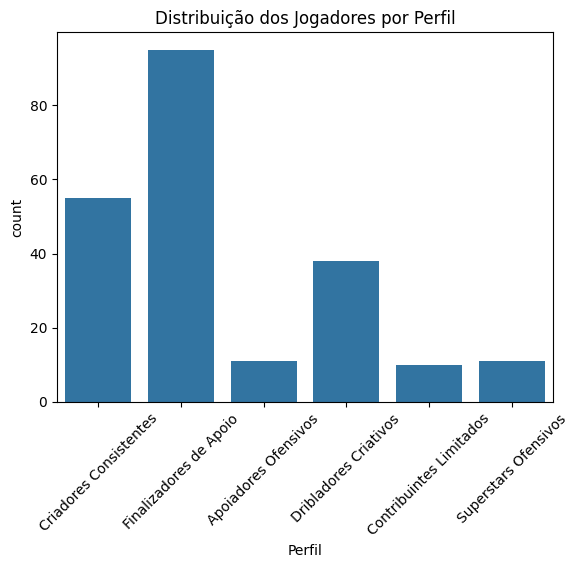

In [33]:
sns.countplot(data=meia_ofensivo, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()

In [49]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','xG','xAG','G-PK','Assistencias','PrgC','PrgP','Key_Pass','Passing 1/3','Cross','Dribles_Tentados','Dribles_certos',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "Mestres Criativos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)


Jogadores no perfil: Mestres Criativos
                  jogador            time posicao  Minutos    xG  xAG  G-PK  Assistencias  PrgC  PrgP  Key_Pass  Passing 1/3  Cross  Dribles_Tentados  Dribles_certos
32             Alejo Cruz  Atl Goianiense   FW,MF     1935   2.3  3.4     0             1    62   105        62           77    169                50              22
67                Shaylon  Atl Goianiense   FW,MF     1966   3.9  4.6     1             1    30   119        57           92    119                22               8
112  Cauly Oliveira Souza           Bahia   MF,FW     2476   3.3  5.0     4             5    60   129        64          116     84                89              40
154    Jefferson Savarino   Botafogo (RJ)   MF,FW     1862   4.9  6.4     6             7    45   120        74           75    115                19               8
210         Rodrigo Garro     Corinthians   MF,FW     2734   5.4  6.7     8             9    54   217        92          174    21

In [50]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG': 1.1,
    'xAG': 1.85,
    'G-PK': 1.80,
    'Assistencias': 2,
    'Acoes Ofensivas': 1.2,
    'Key_Pass': 1.5,
    'Passing 1/3': 1.1,
    'Cross': 1.0,
    '%Dribles': 1.25
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    # Verifica se a coluna é numérica antes de normalizar
    if pd.api.types.is_numeric_dtype(coluna):
        return coluna / coluna.max()
    else:
        # Se a coluna não for numérica, converte para numérica
        # (ignorando erros para valores não numéricos)
        return pd.to_numeric(coluna, errors='coerce') / pd.to_numeric(coluna, errors='coerce').max()

# Normalizando 'Acoes Ofensivas' e 'Dribles'
meia_ofensivo['Acoes Ofensivas'] = normalizar(meia_ofensivo['Acoes Ofensivas']) * 100
meia_ofensivo['%Dribles'] = normalizar(meia_ofensivo['%Dribles']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    meia_ofensivo[coluna + '_Pontuacao'] = meia_ofensivo[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
meia_ofensivo['Pontuacao_Total'] = meia_ofensivo[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = meia_ofensivo['Pontuacao_Total'].min()
max_pontuacao = meia_ofensivo['Pontuacao_Total'].max()
meia_ofensivo['Pontuacao'] = (
    (meia_ofensivo['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'Mestres Criativos'
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: Mestres Criativos
 Ranking           time posicao              jogador            Perfil  Pontuacao
       1    Corinthians   MF,FW        Rodrigo Garro Mestres Criativos      100.0
       2      Palmeiras      MF        Raphael Veiga Mestres Criativos  81.160565
       3       Cruzeiro   FW,MF      Matheus Pereira Mestres Criativos  80.606035
       4         Grêmio   MF,FW     Franco Cristaldo Mestres Criativos  60.429507
       5 Atl Goianiense   FW,MF           Alejo Cruz Mestres Criativos   59.70647
       6  Internacional   MF,FW         Alan Patrick Mestres Criativos   58.82706
       7  Botafogo (RJ)   MF,FW   Jefferson Savarino Mestres Criativos  58.552975
       8          Bahia   MF,FW Cauly Oliveira Souza Mestres Criativos  57.730167
       9 Atl Goianiense   FW,MF              Shaylon Mestres Criativos  53.522961
      10      Fortaleza   MF,FW     Tomas Pochettino Mestres Criativos   47.54272


In [51]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'Mestres Criativos'  # Defina o perfil desejado
jogadores_filtrados = meia_ofensivo[meia_ofensivo['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))

Jogadores disponíveis no perfil 'Mestres Criativos': ['Alejo Cruz', 'Shaylon', 'Cauly Oliveira Souza', 'Jefferson Savarino', 'Rodrigo Garro', 'Matheus Pereira', 'Tomas Pochettino', 'Franco Cristaldo', 'Alan Patrick', 'Raphael Veiga']
Digite o nome do jogador (ou 'sair' para finalizar): Rodrigo Garro
Insira o valor de mercado para Rodrigo Garro (€M): 9
Digite o nome do jogador (ou 'sair' para finalizar): Matheus Pereira
Insira o valor de mercado para Matheus Pereira (€M): 8.5
Digite o nome do jogador (ou 'sair' para finalizar): Cauly Oliveira Souza
Insira o valor de mercado para Cauly Oliveira Souza (€M): 6
Digite o nome do jogador (ou 'sair' para finalizar): Tomas Pochettino
Insira o valor de mercado para Tomas Pochettino (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): Raphael Veiga
Insira o valor de mercado para Raphael Veiga (€M): 15
Digite o nome do jogador (ou 'sair' para finalizar): Alan Patrick
Insira o valor de mercado para Alan Patrick (€M): 4
Digite o nome do joga


Jogadores selecionados: Alejo Cruz, Rodrigo Garro, Alan Patrick
      xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Key_Pass  Passing 1/3  Cross  %Dribles  Minutos
32   2.3  3.4     0             1        43.041237        62           77    169       NaN     1935
210  5.4  6.7     8             9        69.845361        92          174    211       NaN     2734
473  6.9  8.1     4             3        41.494845        79           83    108       NaN     1687


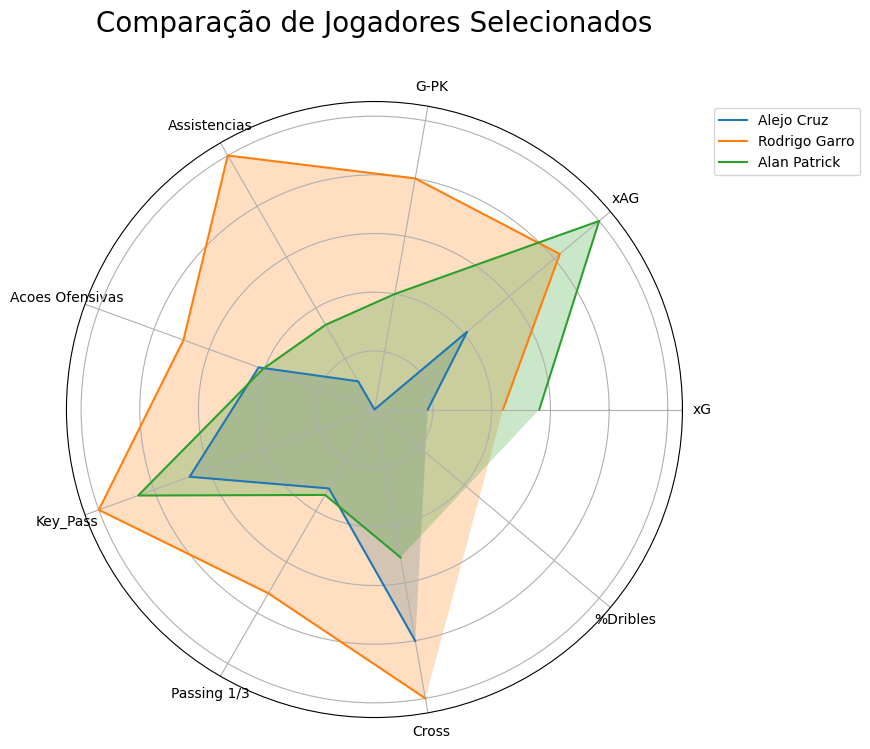

In [53]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','%Dribles','Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Key_Pass','Passing 1/3','Cross','%Dribles']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Alejo Cruz', 'Rodrigo Garro','Alan Patrick']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, meia_ofensivo)